# Plotting Maps with GeoPandas

In [2]:
# Setup
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd

import utils

## 1. Download and Preprocess the Data

In [3]:
# Download census tracts geo data and correlating population data
shapefile_name = 'tl_2019_06_tract'
shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/census/'

for ext in shapefile_exts:
  url = data_url + shapefile_name + ext
  utils.download(url)

csv_name = 'ACSST5Y2019.S0101_data.csv'
utils.download(data_url + csv_name)

shapefile_path = os.path.join(utils.data_folder, shapefile_name + '.shp')
tracts = gpd.read_file(shapefile_path)
csv_path = os.path.join(utils.data_folder, csv_name)
population_table = pd.read_csv(csv_path, skiprows=[1])

# Check the data setup
print(tracts[0:1])
print(population_table[0:1])

# Match GeoID column title and format across the GeoDataFrame and DataFrame to allow merge
filtered_pop_table = population_table[['GEO_ID','NAME', 'S0101_C01_001E']]
filtered_pop_table = filtered_pop_table.rename(columns = {'S0101_C01_001E': 'Population', 'GEO_ID': 'GEOID'})
filtered_pop_table['GEOID'] = filtered_pop_table.GEOID.str[-11:]

# Merge the population data into the GeoDataFrame
gdf = tracts.merge(filtered_pop_table, on='GEOID')

# Normalize the pop. density
gdf['density'] = 1e6*gdf['Population']/gdf['ALAND'] # persons / square km

  STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  MTFCC  \
0      06      037  139301  06037139301  1393.01  Census Tract 1393.01  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  2865657       0  +34.1781538  -118.5581265   

                                            geometry  
0  POLYGON ((-118.57150 34.17758, -118.57148 34.1...  
                 GEO_ID                                           NAME  \
0  1400000US06001400100  Census Tract 4001, Alameda County, California   

   S0101_C01_001E  S0101_C01_001M  S0101_C01_002E  S0101_C01_002M  \
0            3120             208             188              94   

   S0101_C01_003E  S0101_C01_003M  S0101_C01_004E  S0101_C01_004M  ...  \
0              56              49             168              73  ...   

   S0101_C06_034E  S0101_C06_034M  S0101_C06_035E  S0101_C06_035M  \
0             (X)             (X)             (X)             (X)   

   S0101_C06_036E  S0101_C06_036M 

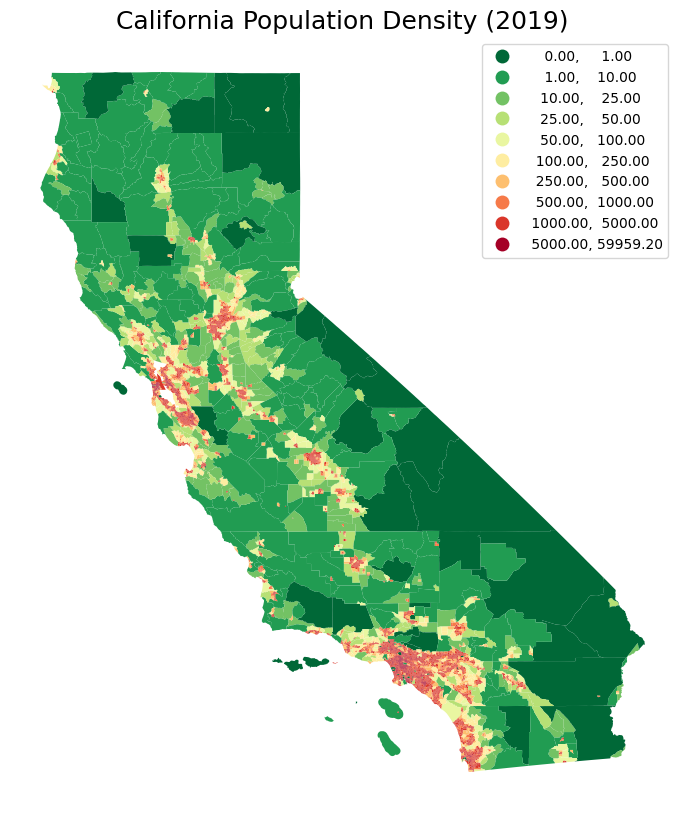

In [4]:
# Plot the map with region color based on pop. density and save as a png
output_path = os.path.join(utils.output_folder, 'california_pop.png')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=dict(bins=[1,10,25,50,100, 250, 500, 1000, 5000]),
         legend=True)
ax.set_axis_off()
ax.set_title('California Population Density (2019)', size = 18)

plt.savefig(output_path, dpi=300)

plt.show()

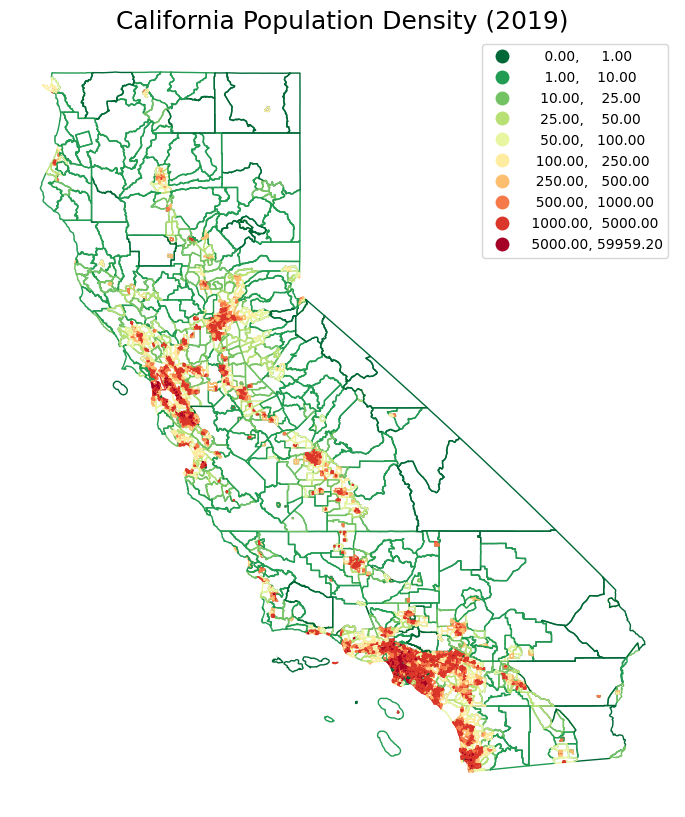

In [5]:
# Plot the same map without fill to emphasize the tracts
image_path = os.path.join(utils.results_folder, 'california_pop.png')

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
gdf.plot(ax=ax, column='density', cmap='RdYlGn_r', scheme='User_Defined',
         classification_kwds=dict(bins=[1,10,25,50,100, 250, 500, 1000, 5000]),
         legend=True, facecolor='none')
ax.set_axis_off()
ax.set_title('California Population Density (2019)', size = 18)

plt.savefig(image_path, dpi=300)

plt.show()